This notebook is adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html and https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Introduction: exploring toy data

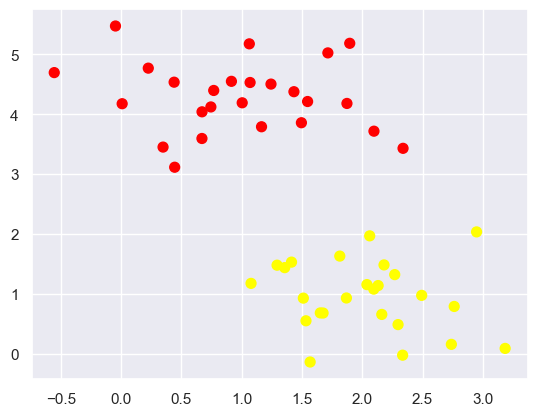

In [5]:
# plot some data from two different classes
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Your turn: what happens when you change the value of the cluster_std variable?

**The clusters become more or less spread out where a lower value makes them less spread out.**

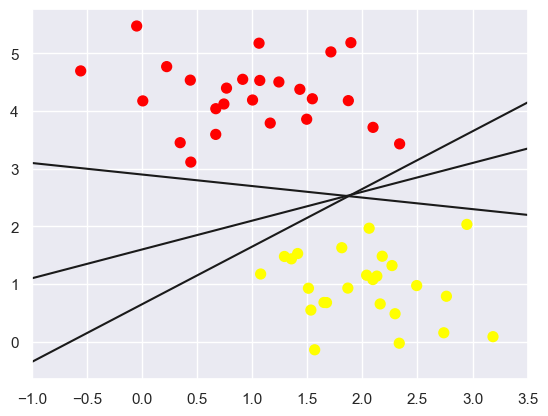

In [6]:
# draw linear separators between the data
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Your turn: plot another linear separator

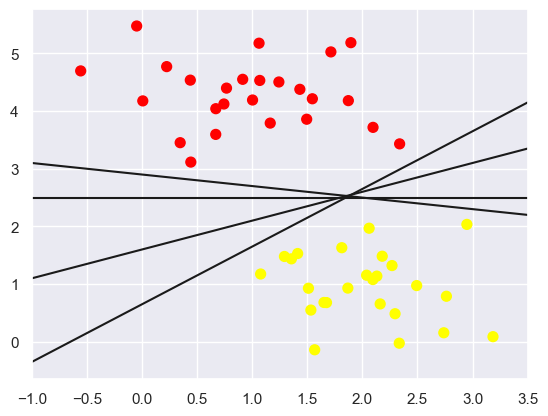

In [7]:
# Answer:
# draw linear separators between the data
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9), (0,2.5)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

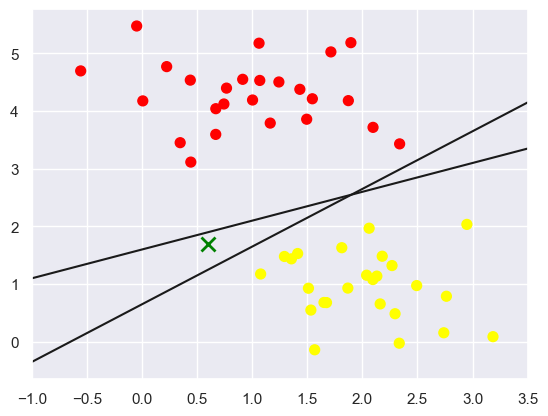

In [8]:
# let's add another data point to our set
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

plt.plot([0.6], [1.7], 'x', color='green', markeredgewidth=2, markersize=10)

Depending on which linear separator we choose, the new point will either be grouped with the red points or the yellow points.

Your turn: How do we choose an ideal linear separator? How does this relate to the picture below?

**We can create a margin around our linear separator and choose the one that maximizes the margin.**

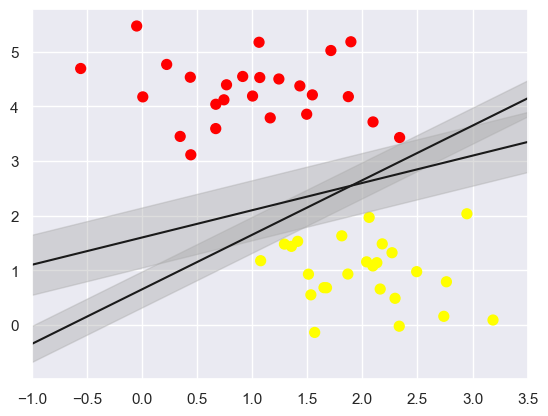

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

# Fitting an SVM

In [10]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) # we will talk about what kernel and C are later
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [11]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


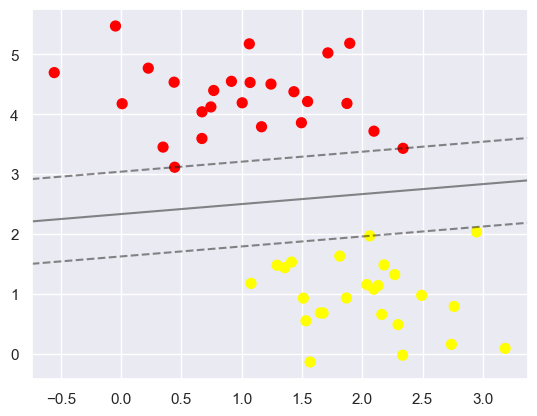

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Your turn: what is the solid line? What do the dashed lines represent?

**The solid line is our linear separator and the dashed line are the margin based off of our support vectors.**

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Your turn: what does the output of the above line mean?

**These are the slope and intercept of our linear separator/margin.**

Note that adding more points to the data set does not affect the optimal linear separator as long as the added points are not within the margin of the optimal linear separator.

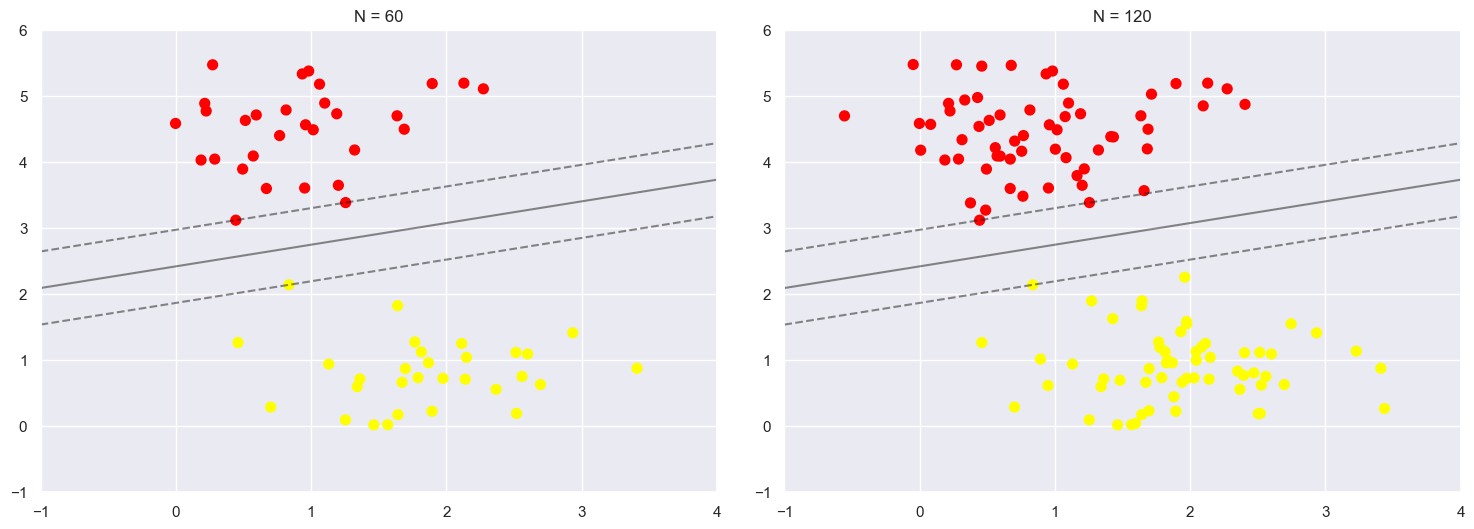

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Your turn: add a point (either red or yellow) that's within the margin of the optimal linear separator and re-run the SVM code. What happens?

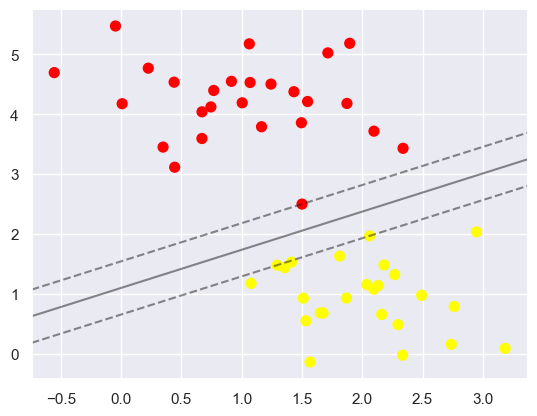

In [20]:
model = SVC(kernel='linear', C=1E10)
X_new = np.append(np.array([[1.5, 2.5]]), X, axis=0)
y_new = np.append(np.array([0]), y, axis=0)
model.fit(X_new, y_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [15]:
# we can visualize this using an interactive plot
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

# Kernel SVM

First, watch this video: https://www.youtube.com/watch?v=Q7vT0--5VII&t=94s

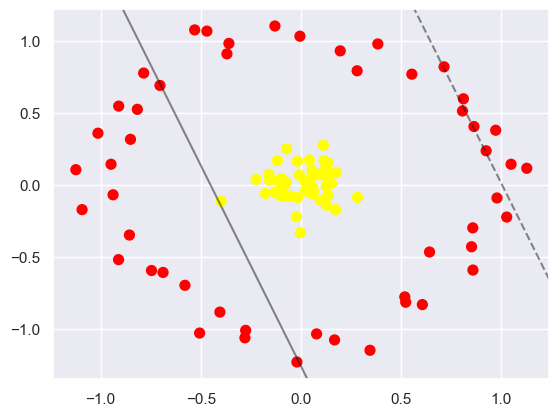

In [21]:
# Generate some data that can't be separated by a hyperplane
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

This data is roughly in the shape of a circle, so it makes sense to use a radial basis function as our kernel function
$$r = e^{-x^2}$$

In [22]:
r = np.exp(-(X ** 2).sum(1))

Your turn: plot this function, either in python or another graphing calculator

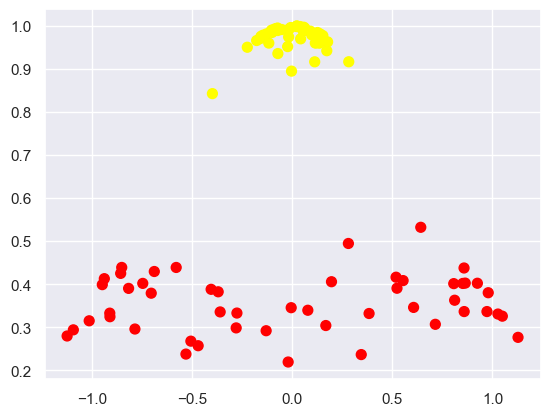

In [26]:
# Answer:
plt.scatter(X[:, 0], r, c = y, s=50, cmap='autumn')

We project the data into a 3d space using the radial basis function. Notice that we can separate the yellow and red points by a hyperplane now.

In [27]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

Now, we put this all together by using the SVC function to project the data into 3d space using the radial basis function, then performing SVM to find the optimal separating hyperplane.

In [28]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

We then project back down into 2d space

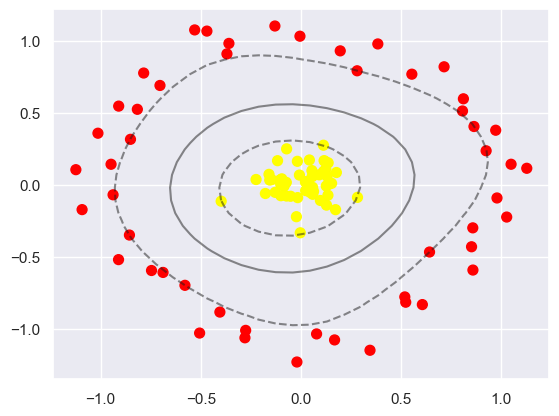

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Your turn: Repeat this section with a different kernel function.

# Tuning the SVM: Softening Margins

Now, we figure out what the C parameter in the SVC function does.

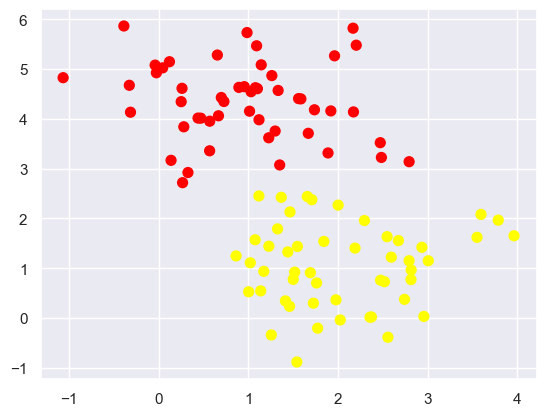

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

When red and yellow points are close or overlapping, it can be hard or impossible to draw a linear separator that perfectly separates the two groups. To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

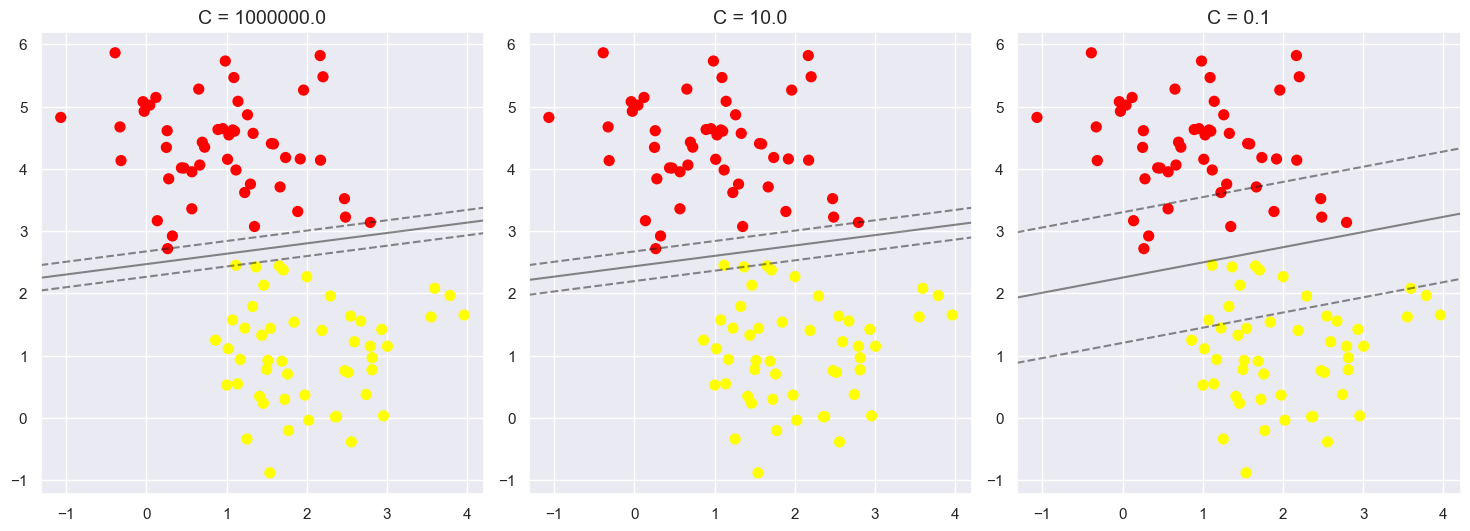

In [46]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [1E6, 10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Note that not only do the margins of the optimal linear separator change, but the linear separator itself changes.

# Testing the SVM

The idea behind the optimal linear separator is that if we add new points to our dataset, the linear separator will properly classify them. We test this by splitting our data into training and testing sets.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Your turn: On the same graph, plot the training points in red and yellow, and the testing points in blue and green.

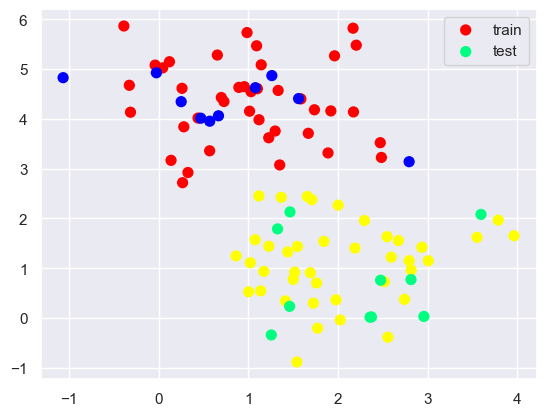

In [48]:
# Answer:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn', label = 'train');
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter', label = 'test');
plt.legend();

In [49]:
model = SVC(kernel='linear', C=1E4) # we will talk about what kernel and C are later
model.fit(X_train, y_train)

SVC(C=10000.0, kernel='linear')

In [50]:
# we measure how well the SVM trained on the training data classifies the points in the testing data
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


Your turn: Find and plot the optimal linear separator using SVM

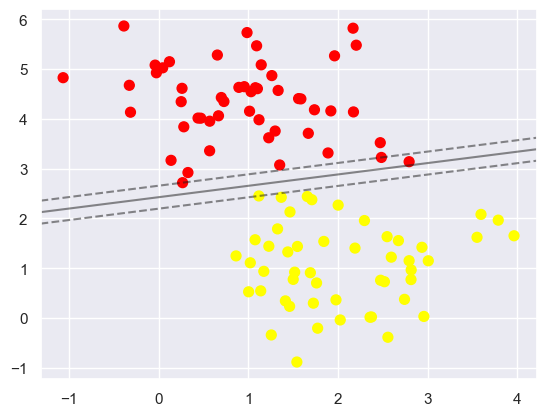

In [51]:
# Answer:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);


Let's see what happens when the red and yellow points overlap:

Model accuracy score with default hyperparameters: 0.9000


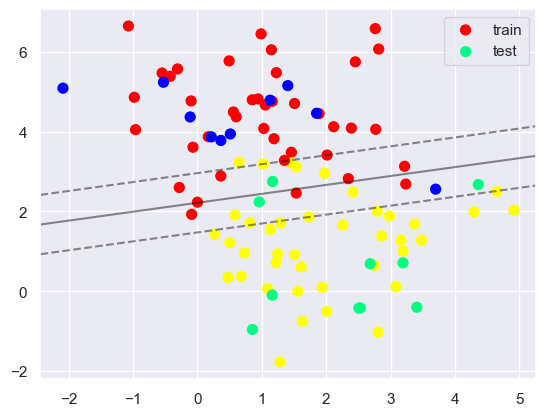

In [58]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn', label = 'train');
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter', label = 'test');
plt.legend();

model = SVC(kernel='linear', C=1E4) # we will talk about what kernel and C are later
model.fit(X_train, y_train)

plot_svc_decision_function(model, plot_support=False);

y_pred=model.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called a Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is called a Type II error.

Confusion matrix

 [[9 1]
 [1 9]]

True Positives(TP) =  9

True Negatives(TN) =  9

False Positives(FP) =  1

False Negatives(FN) =  1


<Axes: >

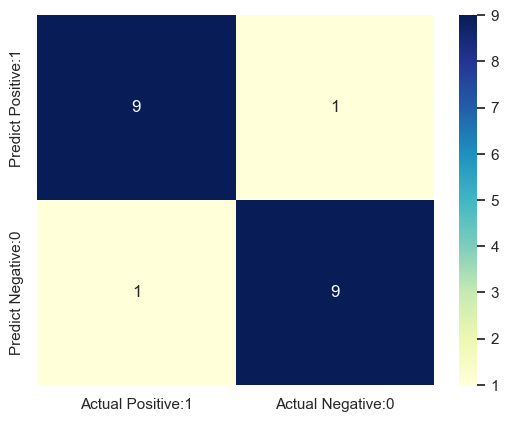

In [59]:
from sklearn.metrics import confusion_matrix

y_pred_test=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Example with real-world data

Your turn: Find a dataset of points that can be classified into two groups. Split your data into train and test sets, and perform SVM on the training set using different kernel functions and values of C. Use the testing set to create a confusion matrix to evaluate the accuracy of your model.